## 函数

In [1]:
abs(100)

100

In [2]:
abs(-100)#求绝对值

100

In [3]:
max(1,2)#返回最大的值

2

* 数据类型转换

In [4]:
int('123')

123

In [5]:
int(12.34)

12

In [6]:
str(1.23)

'1.23'

In [7]:
bool(1)

True

In [8]:
bool('')

False

In [9]:
a = abs
a(-1)

1

In [10]:
n1 = 255
hex(n1)#转换成十六进制表示的字符串

'0xff'

## 定义函数

In [11]:
#自定义一个求绝对值的函数
def my_abs(x):
    if not isinstance(x,(int,float)):
        raise TypeError('Bad operand type')
    if x >= 0:
        return x
    else:
        return -x
my_abs(1)

1

In [12]:
my_abs(-2)

2

### 空函数

In [13]:
def nop():
    pass#什么也不做，作为一个占位符

### 参数检查

In [14]:
#my_abs('A')#只允许整数和浮点数

### 返回多个值

In [15]:
import math
def move(x,y,step,angle = 0):
    nx = x + step * math.cos(angle)
    ny = y - step * math.sin(angle)
    return nx,ny

In [16]:
x,y = move(100,100,60,math.pi / 6)
print(x,y)

151.96152422706632 70.0


In [17]:
r = move(100,100,60,math.pi / 6)
print(r)

(151.96152422706632, 70.0)


原来返回值是一个 tuple！但是，在语法上，返回一个 tuple 可以省略括号，而多个变量可以同时接收一个 tuple，按位置赋给对应的值。

#### 小练习

定义一个函数 quadratic(a, b, c)，接收 3 个参数，返回一元二次方程：ax2 + bx + c = 0的两个解

In [18]:
def quadratic(a,b,c):
    if b * b - 4 * a * c > 0:
        x1 = -(b / 2 * a)
        x2 = c / 2 * a
        return x1,x2
    else:
        return 'error'

In [19]:
# x1,x2 = quadratic(1,2,3)
# print(x1,x2)

## 函数的参数

### 位置参数

In [20]:
def power(x):
    return x * x

In [21]:
power(5)

25

* 由于要计算x^3,x^4...，所以将函数power(x)修改为power(x,n)，用来计算x^n。

In [22]:
def power(x,n):
    s = 1
    while n > 0:
        n = n - 1
        s = s * x
    return s

In [23]:
power(2,3)

8

### 默认参数

In [24]:
#经常计算的是二次方，所以将n=2设为默认值
def power(x,n = 2):
    s = 1
    while n > 0:
        n = n - 1
        s = s * x
    return s

In [25]:
power(5)#默认传入的n=2

25

In [26]:
power(5,3)#计算5的3次方

125

* 默认函数的注意事项
 * 必选参数在前，默认参数在后
 * 当函数有多个参数时，把变化大的参数放前面，变化小的参数放后面    

In [27]:
def enrol(name,gender,age = 6,city = 'BeiJing'):
    print('name:',name)
    print('gender:',gender)
    print('age:',age)
    print('city:',city)

In [28]:
enrol('Sarah','F')

name: Sarah
gender: F
age: 6
city: BeiJing


In [29]:
enrol('Bob','T','20')

name: Bob
gender: T
age: 20
city: BeiJing


In [30]:
def add_end(L = []):
    L.append('END')
    return L

In [31]:
add_end([1,2,3])

[1, 2, 3, 'END']

In [32]:
add_end()

['END']

In [33]:
add_end()#再次调用

['END', 'END']

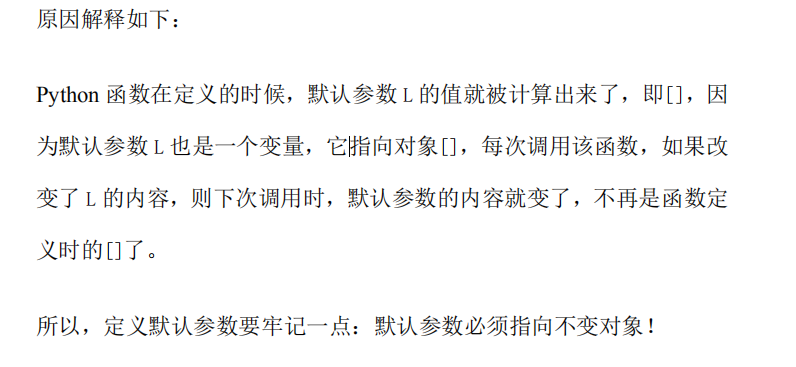

In [34]:
#修改上面的函数
def add_end(L = None):
    if L is None:
        L = []
    L.append('END')
    return L

In [35]:
add_end()

['END']

In [36]:
add_end()

['END']

### 可变参数

In [37]:
def calc(numbers):
    sum = 0
    for n in numbers:
        sum = sum + n * n
    return sum

In [38]:
calc([1,2,3])#传入一个list或tuple

14

In [39]:
calc((1,3,5,7))

84

In [40]:
#可以简化为
def calc(*numbers):#参数numbers接收到的是一个tuple
    sum = 0
    for n in numbers:
        sum = sum + n * n
    return sum

In [41]:
calc(1,3,2)

14

In [42]:
calc()

0

In [43]:
#已经有一个list或者tuple
nums = [1,2,3]
calc(nums[0],nums[1],nums[2])

14

In [44]:
#简化为
calc(*nums)#表示把nums这个list的所有元素作为可变参数传进去

14

In [45]:
num = (1,2,3)
calc(*num)

14

### 关键字参数

* 关键字参数允许传入0个或者任意个含参数名的参数，自动组装为一个dict。

In [46]:
def person(name,age,**kw):
    print('name:',name,"age:",age,'other:',kw)

In [47]:
person('Bob',30)

name: Bob age: 30 other: {}


In [48]:
#传入任意个数的关键字参数
person('Bob',25,city='BeiJing',University='NUC')

name: Bob age: 25 other: {'city': 'BeiJing', 'University': 'NUC'}


In [49]:
#可以先组装为一个dict，然后再传入进去
extra = {'city':'TaiYuan','University':'NUC','Job':'Student'}
person('小飞侠','20',city=extra['city'],University=extra['University'],Job=extra['Job'])

name: 小飞侠 age: 20 other: {'city': 'TaiYuan', 'University': 'NUC', 'Job': 'Student'}


In [50]:
#简化写法
extra = {'city':'TaiYuan','University':'NUC','Job':'Student'}
person('Jack',18,**extra)#传入所有的值

name: Jack age: 18 other: {'city': 'TaiYuan', 'University': 'NUC', 'Job': 'Student'}


### 命名关键字参数

* 如果要限制关键字参数的名字，用命名关键字参数，例如只接收city和job作为关键字参数。

In [51]:
def person(name,age,*,city,job):#*后面的参数被视为命名关键字参数,*是特殊分隔符
    print(name,age,city,job)

In [52]:
person('Jack',24,city='BeiJing',job='Engineer')

Jack 24 BeiJing Engineer


In [53]:
def person(name,age,*,city='BeiJing',job):
    print(name,age,city,job)

In [54]:
person('Jack',10,job='Engineer')

Jack 10 BeiJing Engineer


### 参数组合

* 参数定义的顺序必须是：必选参数，默认参数，可变参数/命名关键字参数和关键字参数。

In [55]:
def f1(a,b,c = 0,*args,**kw):
    print('a =',a,'b =',b,'c =',c,'args =',args,'kw =',kw)
    
def f2(a,b,c = 0, *, d, **kw):
    print('a =',a,'b =',b,'c =',c,'d =','kw =',kw)

In [56]:
f1(1,2)

a = 1 b = 2 c = 0 args = () kw = {}


In [57]:
f1(1,2,c = 3)

a = 1 b = 2 c = 3 args = () kw = {}


In [58]:
f1(1,2,3,'a','b')

a = 1 b = 2 c = 3 args = ('a', 'b') kw = {}


In [59]:
f1(1,2,3,'a','b',x = 99)

a = 1 b = 2 c = 3 args = ('a', 'b') kw = {'x': 99}


In [60]:
f2(1,2,d = 99,ext=None)

a = 1 b = 2 c = 0 d = kw = {'ext': None}


In [61]:
args = (1,2,3,4,5)
kw = {'d':99,'x':'#'}
f1(*args,**kw)

a = 1 b = 2 c = 3 args = (4, 5) kw = {'d': 99, 'x': '#'}


In [62]:
args = (1,2,3)
kw = {'d':88,'x':'#'}
f2(*args,**kw)

a = 1 b = 2 c = 3 d = kw = {'x': '#'}



* *args是可变参数，args接收的是一个tuple
* **kw是关键字参数，kw接收的是一个dict

## 递归函数

In [63]:
#求阶乘
def fact(n):
    if n == 1:
        return 1
    return n * fact(n - 1)

In [64]:
fact(1)

1

In [65]:
fact(5)

120

In [66]:
fact(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

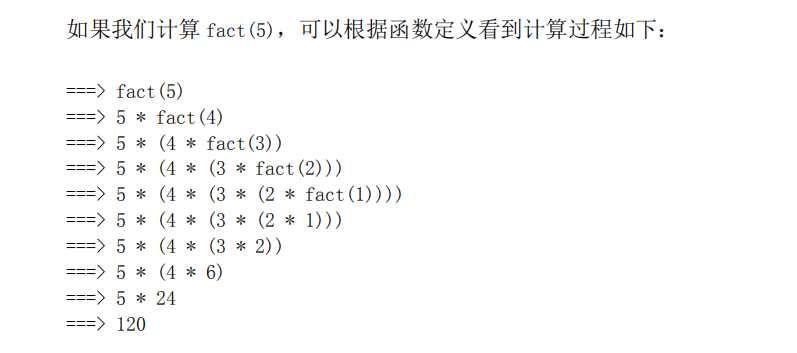


* 解决递归调用栈溢出的方法是通过尾递归优化。尾递归是指，在函数返回的时候，调用自身本身，并且return语句不能包含表达式。

In [67]:
#改进阶乘函数
def fact(n):
    return fact_iter(n,1)

def fact_iter(num,product):
    if num == 1:
        return product
    return fact_iter(num - 1,num * product)

In [68]:
fact_iter(5,1)

120

In [69]:
fact_iter(4,5)

120

### 小练习

* 编写 move(n, a, b, c)函数，它接收参数 n，表示 3 个柱子 A、B、C中第 1 个柱子 A 的盘子数量，然后打印出把所有盘子从 A 借助 B 移动到 C 的方法。

In [70]:
def move(n,a,b,c):
    if n == 1:
        print('move',a,'-->',c)
    else:
        move(n-1,a,c,b)
        move(1,a,b,c)
        move(n-1,b,a,c)

In [71]:
move(3,'A','B','C')

move A --> C
move A --> B
move C --> B
move A --> C
move B --> A
move B --> C
move A --> C
